<a href="https://colab.research.google.com/github/dpierso1/Pierson_IT533/blob/main/Week_7_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)



In [ ]:
airline = pd.read_csv("https://raw.githubusercontent.com/dpierso1/Pierson_IT533/main/airline_passenger_satisfaction.csv")
airline.head()

,ID,Gender,Age,CustomerType,TypeOfTravel,Class,FlightDistance,DepartureDelay,ArrivalDelay,EaseOfOnlineBooking,...,On-boardService,SeatComfort,LegRoom,Cleanliness,FoodAndDrink,In-flightWifi,In-flightEntertainment,BaggageHandling,PriceUSD,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,3,5,5,1053.59,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,2,5,5,1051.94,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,4,3,3,1627.35,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,2,5,5,2520.45,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,6048.50,Satisfied


In [ ]:
airline.describe()

,ID,Age,FlightDistance,DepartureDelay,ArrivalDelay,EaseOfOnlineBooking,Check-inService,OnlineBoarding,On-boardService,SeatComfort,LegRoom,Cleanliness,FoodAndDrink,In-flightWifi,In-flightEntertainment,BaggageHandling,PriceUSD
count,126126.000000,126126.000000,126126.000000,126126.000000,125743.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.000000,126126.00000,126126.000000,126126.000000,126126.000000
mean,63063.500000,39.424591,1181.628792,14.879454,15.251577,2.756434,3.304703,3.250575,3.382015,3.440472,3.348976,3.286016,3.204811,2.72977,3.358475,3.630060,1675.037095
std,36409.584363,15.112912,996.804197,38.328703,38.725086,1.402808,1.267337,1.351397,1.287395,1.319436,1.317025,1.313950,1.330497,1.32987,1.334068,1.181415,1567.965431
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,30.990000
25%,31532.250000,27.000000,409.000000,0.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,529.402500
50%,63063.500000,40.000000,835.000000,0.000000,0.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.00000,4.000000,4.000000,1055.895000
75%,94594.750000,51.000000,1723.000000,13.000000,13.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,2393.817500
max,126126.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,9924.120000


In [ ]:
airline['Class'].head()

0    Business
1    Business
2    Business
3    Business
4    Business
Name: Class, dtype: object

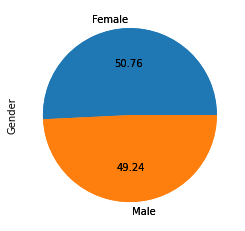

In [ ]:

airline.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
airline['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

In [ ]:
airline2 = pd.DataFrame(airline, columns = ['SeatComfort', 'Cleanliness', 'FoodAndDrink', 'FlightDistance', 'CustomerType'])
airline2.head()

,SeatComfort,Cleanliness,FoodAndDrink,FlightDistance,CustomerType
0,5,5,5,821,First-time
1,4,5,3,821,Returning
2,5,5,5,853,Returning
3,5,4,4,1905,Returning
4,4,5,4,3470,Returning


In [ ]:
from sklearn.model_selection import train_test_split
x=airline2.iloc[:,:4] # all parameters
y=airline2['CustomerType'] # class labels 'First-time', 'Returning'
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .20)                              
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (100900, 4)
X_test shape: (25226, 4)


In [ ]:
# Configuring the classifier and using get_params to double-check all the parameters with which it is configured

rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [ ]:
# This is the solution for task 2 above. 
airline_rf = pd.DataFrame(airline, columns = ['SeatComfort', 'Cleanliness', 'FoodAndDrink','FlightDistance','CustomerType'])
airline_rf.head()

,SeatComfort,Cleanliness,FoodAndDrink,FlightDistance,CustomerType
0,5,5,5,821,First-time
1,4,5,3,821,Returning
2,5,5,5,853,Returning
3,5,4,4,1905,Returning
4,4,5,4,3470,Returning


In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
print(y_pred) 

['Returning' 'Returning' 'Returning' ... 'Returning' 'Returning'
 'Returning']


In [ ]:
# First, the accuracy score
accuracy_score(y_test, y_pred)

0.7895821771188456

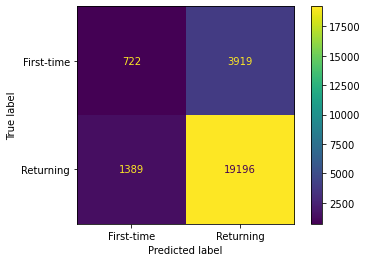

In [ ]:
# Next, the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

In [ ]:
# Finally, the Classification Report
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['Returning', 'First-time']))

              precision    recall  f1-score   support

   Returning       0.83      0.93      0.88     20585
  First-time       0.34      0.16      0.21      4641

    accuracy                           0.79     25226
   macro avg       0.59      0.54      0.55     25226
weighted avg       0.74      0.79      0.76     25226



1,000 model Tree

In [ ]:
# This is the solution for task 2 above. 
airline_rf2 = pd.DataFrame(airline, columns = ['SeatComfort', 'Cleanliness', 'FoodAndDrink','FlightDistance','CustomerType'])
airline_rf2.head()

,SeatComfort,Cleanliness,FoodAndDrink,FlightDistance,CustomerType
0,5,5,5,821,First-time
1,4,5,3,821,Returning
2,5,5,5,853,Returning
3,5,4,4,1905,Returning
4,4,5,4,3470,Returning


In [ ]:
from sklearn.model_selection import train_test_split
x=airline_rf2.iloc[:,:4] # all parameters
y=airline_rf2['CustomerType'] # class labels 'First-time', 'Returning'
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .20)                              
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (100900, 4)
X_test shape: (25226, 4)


In [ ]:
rf2 = RandomForestClassifier()
rf2.get_params
rf2 = RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
rf2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred = rf2.predict(X_test)
print(y_pred) 

['Returning' 'Returning' 'Returning' ... 'Returning' 'Returning'
 'Returning']


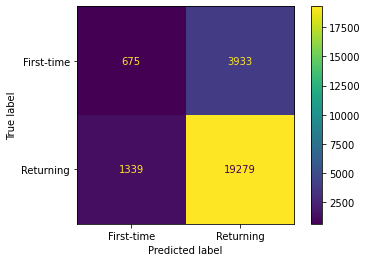

In [ ]:
# Next, the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf2, X_test, y_test)

In [ ]:
# Finally, the Classification Report
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['Returning', 'First-time']))

              precision    recall  f1-score   support

   Returning       0.83      0.94      0.88     20618
  First-time       0.34      0.15      0.20      4608

    accuracy                           0.79     25226
   macro avg       0.58      0.54      0.54     25226
weighted avg       0.74      0.79      0.76     25226

